In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, json
import re, emoji, itertools
from collections import Counter

#drawing wordcloud
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

from scipy.stats import kstest

# Text Preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn




In [2]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
DATA_PATH_TRAIN = r"../input/nlp-getting-started/train.csv"

In [4]:
df = pd.read_csv(DATA_PATH_TRAIN)

df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
contractions = {"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he's": "he is", "how'd": "how did", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'll": "i will", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'll": "it will", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "must've": "must have", "mustn't": "must not", "needn't": "need not", "oughtn't": "ought not", "shan't": "shall not", "sha'n't": "shall not", "she'd": "she would", "she'll": "she will", "she's": "she is", "should've": "should have", "shouldn't": "should not", "that'd": "that would", "that's": "that is", "there'd": "there had", "there's": "there is", "they'd": "they would", "they'll": "they will", "they're": "they are", "they've": "they have", "wasn't": "was not", "we'd": "we would", "we'll": "we will", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what're": "what are", "what's": "what is", "what've": "what have", "where'd": "where did", "where's": "where is", "who'll": "who will", "who's": "who is", "won't": "will not", "wouldn't": "would not", "you'd": "you would", "you'll": "you will", "you're": "you are", "thx": "thanks"}

In [6]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

One fourth of locations are unknown

<AxesSubplot:>

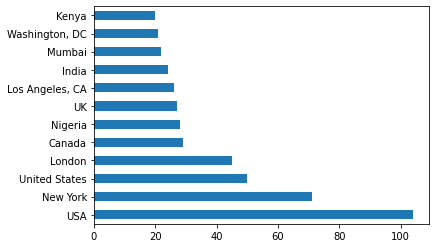

In [7]:
df.location.value_counts()[:12].plot(kind='barh')

By eye we can assume that the most 'disastered' place is USA. The tweets are not divided into only countries or cities (It is hard to perform deeper exploration). There are registered 3341 distinct places.

In [8]:
df.keyword.value_counts()[:14]

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
Name: keyword, dtype: int64

Dataset seems almost balanced.

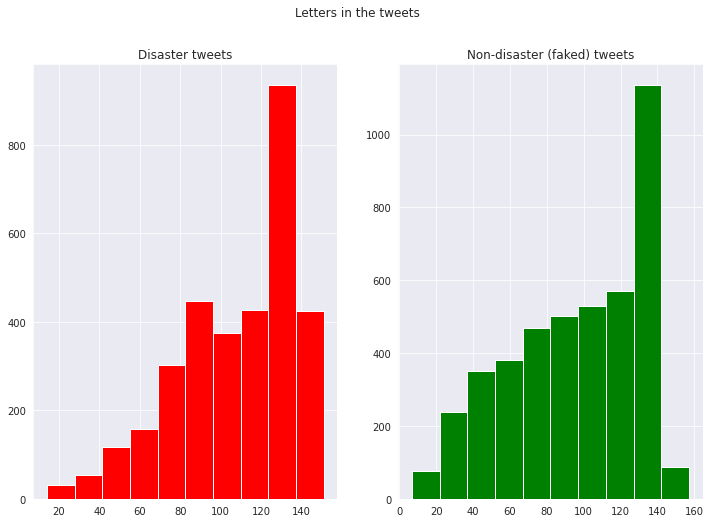

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len_1=df[df['target']==1]['text'].str.len()
ax1.hist(text_len_1,color='red')
ax1.set_title('Disaster tweets')
text_len_2=df[df['target']==0]['text'].str.len()
ax2.hist(text_len_2,color='green')
ax2.set_title('Non-disaster (faked) tweets')
fig.suptitle('Letters in the tweets')
plt.show()



* Kolmogorov–Smirnov test <br>
H0: F1(x)=F2(x) <br>
H1: F1(x)≠F2(x) <br>

In [11]:
kstest(
    text_len_1,
    text_len_2,
    N = 3000)

KstestResult(statistic=0.15774457246877738, pvalue=5.049376034051007e-41)

There is no basis for claiming that the two distributions are the same. By eye we can see that there is more less-lettered tweets in non-disaster group.

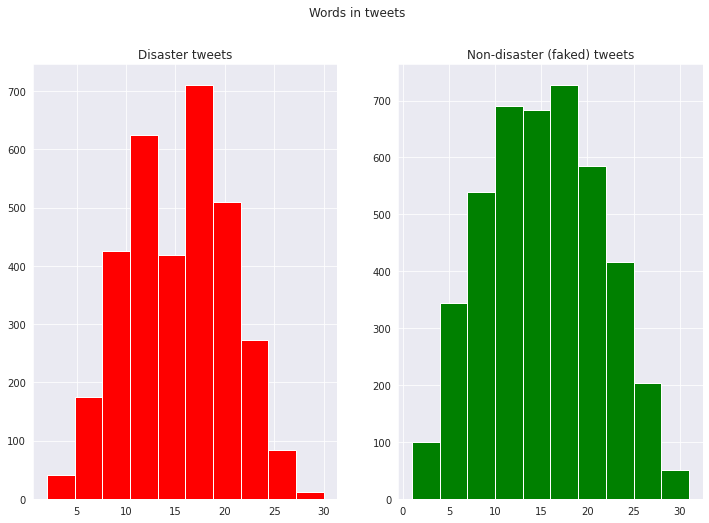

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len_1=df[df['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len_1,color='red')
ax1.set_title('Disaster tweets')
text_len_2=df[df['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len_2,color='green')
ax2.set_title('Non-disaster (faked) tweets')
fig.suptitle('Words in tweets')
plt.show()

* Kolmogorov–Smirnov test <br>
H0: F1(x)=F2(x) <br>
H1: F1(x)≠F2(x) <br>

In [13]:
kstest(
    text_len_1,
    text_len_2,
    N = 3000)

KstestResult(statistic=0.07651667480832142, pvalue=5.98254334960302e-10)

There is no basis for claiming that the two distributions are the same.

## Diving into text column

In [14]:
# A collection of words and punctuation marks to remove from tweets
stop = STOPWORDS
punctuation = list(string.punctuation)
stop.update(punctuation)

In [15]:
def remove_contractions(text):
    """
    Function to replace contractions with their longer forms

    Args:
    string text: text to replace contractions

    Returns:
    string: replaced text
    """
    assert 'contractions' in globals(), "Json file with contractions not loaded"
    return contractions[text.lower()] if text.lower() in contractions.keys() else text

def clean_dataset(text):
    """
    Function to get rid off unwanted patterns
    Args:
    string text: text to clean

    Returns:
    string: replaced text
    """
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove tickers
    text = re.sub(r'\$\w*', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+','', text)
    text = re.sub(r'[ ]{2, }',' ',text)
    # Remove URL, RT, mention(@)
    text=  re.sub(r'http(\S)+', '',text)
    text=  re.sub(r'http ...', '',text)
    text=  re.sub(r'(RT|rt)[ ]*@[ ]*[\S]+','',text)
    text=  re.sub(r'RT[ ]?@','',text)
    text = re.sub(r'@[\S]+','',text)
    # Remove words with 4 or fewer letters
    text = re.sub(r'\b\w{1,4}\b', '', text)
    #&, < and >
    text = re.sub(r'&amp;?', 'and',text)
    text = re.sub(r'&lt;','<',text)
    text = re.sub(r'&gt;','>',text)
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove misspelling words
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    # Remove emoji
    text = emoji.demojize(text)
    text = text.replace(":"," ")
    text = ' '.join(text.split()) 
    text = re.sub("([^\x00-\x7F])+"," ",text)
    # Remove Mojibake (also extra spaces)
    text = ' '.join(re.sub("[^\u4e00-\u9fa5\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    return text

In [16]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip().replace('.',' ').replace(',',' '))
    return " ".join(final_text)

In [17]:
def tokenize(text):
    return [x for x in text.split()]

In [18]:
# Remove blank rows if any.
df['text'].dropna(inplace=True)

# Change all the text to lower case.
df['text'] = [entry.lower() for entry in df['text']]


#Clean text
df['text'] =df['text'].apply(clean_dataset)


# Remove contractions
df['text']=df['text'].apply(remove_contractions)

# Remove stopwords
df['text']=df['text'].apply(remove_stopwords)

# Tokenization : In this each entry in the corpus will be broken into set of words
df['text']= df['text'].apply(tokenize)

# Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV


# Initializing WordNetLemmatizer()
word_Lemmatized = WordNetLemmatizer()

for index,entry in enumerate(df['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'text'] = " ".join(Final_words)

In [19]:
df['text'].head()

0                 deed reason earthquake allah forgive
1                                  forest ronge canada
2    resident ask shelter place notify officer evac...
3    people receive wildfire evacuation order calif...
4              photo alaska smoke wildfire pour school
Name: text, dtype: object

In [20]:
# Function that creates a list of all words in tweets
def get_corpus(text):
    words = []
    for i in text:
        i = str(i)
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
len(corpus)

43701

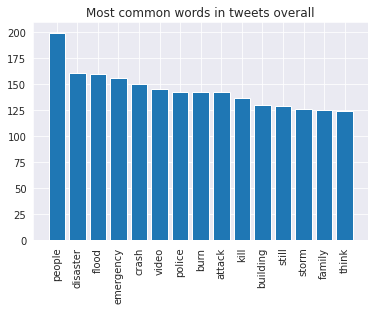

In [21]:
# Word frequency counter in all tweets
counter = Counter(corpus)
most_common = counter.most_common(15)
most_common = dict(most_common)

# del most_common['[]']

plt.bar(
    most_common.keys(),
    most_common.values()
)
plt.xticks(rotation=90)
plt.title("Most common words in tweets overall")
plt.show()

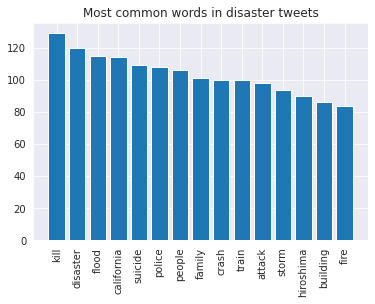

In [30]:
# Word frequency counter in disaster tweets
counter = Counter(get_corpus(df[df['target']==1]['text']))
most_common = counter.most_common(15)
most_common = dict(most_common)



plt.bar(
    most_common.keys(),
    most_common.values()
)
plt.xticks(rotation=90)
plt.title("Most common words in disaster tweets")
plt.show()

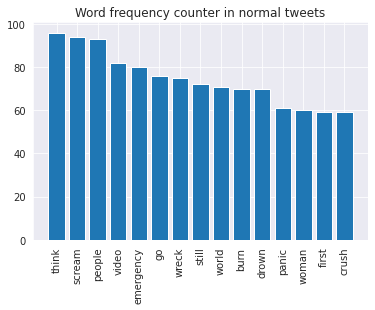

In [23]:
# Word frequency counter in normal tweets
counter = Counter(get_corpus(df[df['target']==0]['text']))
most_common = counter.most_common(15)
most_common = dict(most_common)


plt.bar(
    most_common.keys(),
    most_common.values()
)
plt.xticks(rotation=90)
plt.title("Word frequency counter in normal tweets")
plt.show()

# Wordclouds

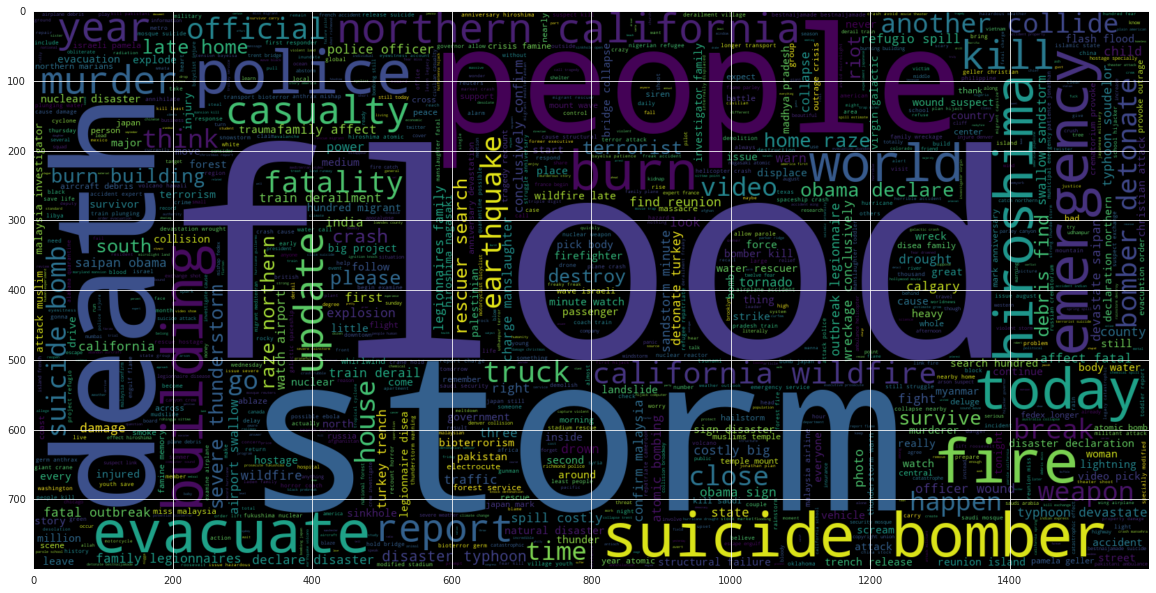

In [24]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(
    max_words = 1000,
    width = 1600,
    height = 800,
    stopwords = STOPWORDS
    ).generate(" ".join(df[df.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

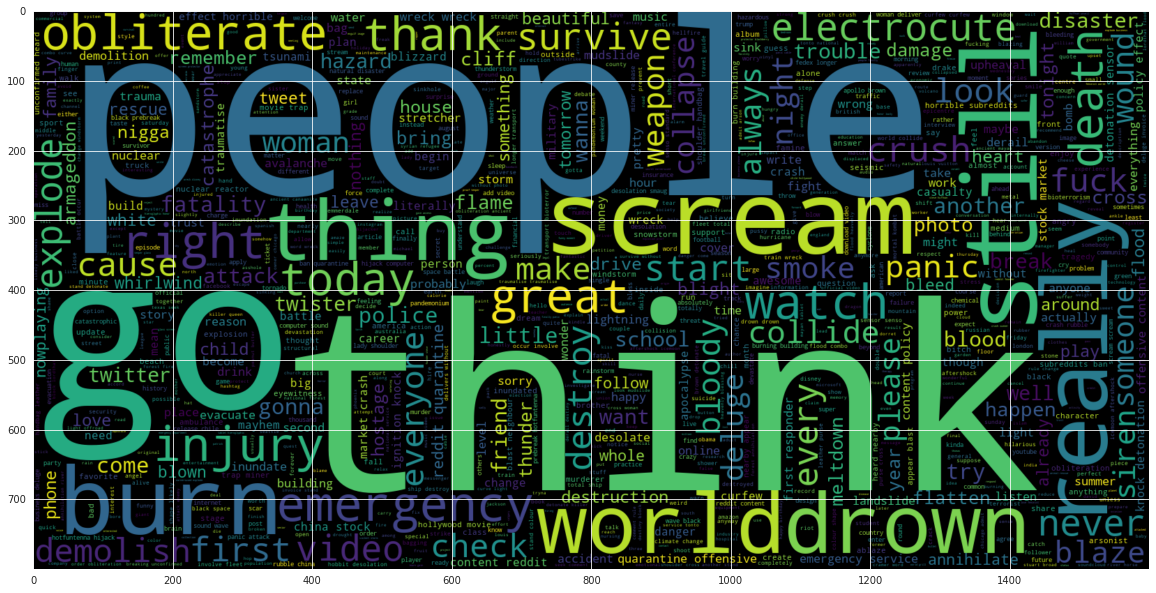

In [25]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(
    max_words = 1000,
    width = 1600,
    height = 800,
    stopwords = STOPWORDS
    ).generate(" ".join(df[df.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

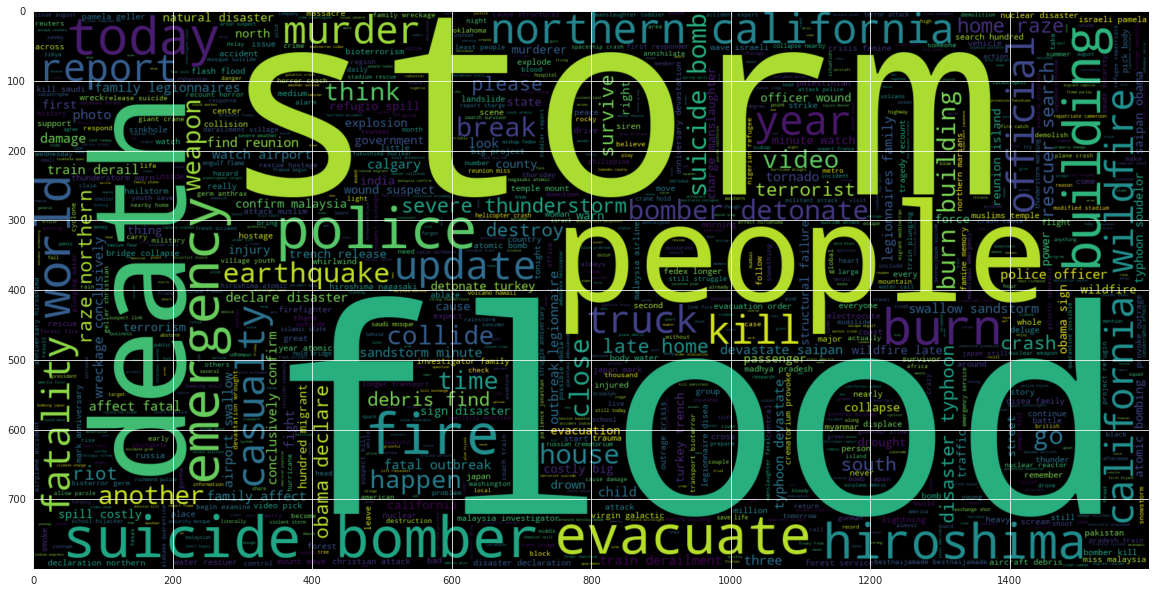

In [29]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(
    max_words = 1000,
    width = 1600,
    height = 800,
    stopwords = STOPWORDS,
    
    ).generate(" ".join(df[df.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')